# TensorFlow Regression example part One

## Our steps are:

1. Build a Graph
2. Initiate the Session
3. Feed Data in and get Output

Let's code along with a more realicstic regression example and introduce tf.estimator

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # important for version 1

In [6]:
x_data = np.linspace(0.0,10.0,1000000)

In [7]:
noise = np.random.randn(len(x_data))

In [8]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [9]:
y_true = (0.5 * x_data) + 5 + noise

In [10]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])

In [11]:
y_df = pd.DataFrame(data= y_true,columns=['Y Data'])

In [12]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [13]:
my_data = pd.concat([x_df,y_df],axis=1)

In [14]:
my_data.head()

,X Data,Y Data
0,0.00000,6.117637
1,0.00001,5.850555
2,0.00002,6.527213
3,0.00003,3.965119
4,0.00004,3.311752


<AxesSubplot:xlabel='X Data', ylabel='Y Data'>

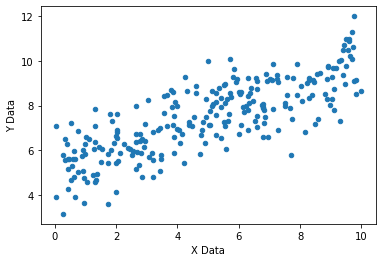

In [15]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y Data')

In [16]:
#bacthes of data 8 out of a million a time

batch_size = 8

In [17]:
m = tf.compat.v1.Variable(0.65)
b = tf.compat.v1.Variable(0.34)

In [18]:
x_ph = tf.compat.v1.placeholder(tf.float32, [batch_size])


In [19]:
y_ph = tf.compat.v1.placeholder(tf.float32, [batch_size])

In [20]:
y_model = m* x_ph + b

In [21]:
# loss function

error = tf.reduce_sum(tf.square(y_ph-y_model))

In [22]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [23]:
init = tf.compat.v1.global_variables_initializer()

In [24]:
with tf.compat.v1.Session() as sess:

    sess.run(init)

    batches = 1000

    for i in range(batches):

        rand_ind = np.random.randint(len(x_data),size=batch_size) # takes 8 random data points from the data set

        feed = {x_ph:x_data[rand_ind],y_ph:y_true[rand_ind]}

        sess.run(train,feed_dict=feed)

    model_m , model_b = sess.run([m,b])

In [25]:
model_m

0.53674316

In [26]:
model_b

4.912796

In [27]:
y_hat = x_data*model_m + model_b

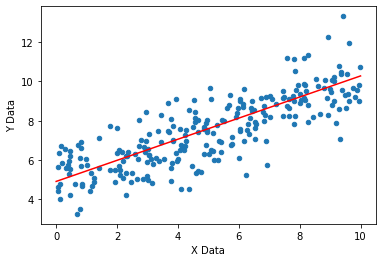

In [28]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y Data')
plt.plot(x_data,y_hat,'r')

# TensorFlow Regression Examlpe Part 2

1. Tf Estimator API from TensorFlow
2. There are alot of other higher level API's (Keras, Layers, Etc)

In general, to use the Estimator API we do the following

1. Define a list of feature columns
2. Create the Estimator Model
3. Create a Data Input Function 
4. call train, evaluate, and predict methods on the estimator object.

OBS very simple example

In [29]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [30]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\flame\\AppData\\Local\\Temp\\tmpb4umxuo8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [ ]:
#input function that handles the batch size and feed

input_func = tf